## Shared Imports

In [1]:
from dataHandler.importer import updateDB
from config import NETWORK, USERNAME, DBFILE

import ipywidgets as widgets

import matplotlib.pyplot as plt

## Temporary Section

In [2]:
import pandas as pd
import numpy as np
from dataHandler.models import Base, Scrobble
import datetime as dt

__create db session__

In [3]:
# this section should be made into a decorator
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
engine = create_engine(('sqlite:///' + DBFILE), echo=False)
Base.metadata.create_all(engine)
Session = sessionmaker(bind=engine)
session = Session()

In [4]:
def colorHash(inString):
    thisHash = abs(hash(inString))
    hexHash = hex(thisHash)[2:8]
    return tuple(int(hexHash[i:i+2], 16)/256.0 for i in (0, 2, 4))

__sql db to pandas df__ 

In [5]:
query_1 = 'SELECT C.id, C.timestamp, C.track, C.album, C.artist, (SELECT COUNT(O.track) FROM [scrobbles] O WHERE O.track = C.track and O.artist = C.artist and O.timestamp <= C.timestamp) as trackCount FROM scrobbles C ORDER BY C.timestamp'


In [6]:
# query = session.query(Scrobble)
query = query_1
records_df = pd.read_sql(query, session.bind)

In [7]:
for index, row in records_df.iterrows():
    maxId = records_df.loc[records_df['timestamp'] <= row['timestamp']]['trackCount'].idxmax()
    records_df.loc[index, 'maxCount'] = records_df.loc[maxId]['trackCount']
    maxSong = records_df.loc[maxId]['track'] + records_df.loc[maxId]['artist']
    records_df.loc[index, 'maxSong'] = maxSong

In [8]:
# plt.scatter(records_df['timestamp'],records_df['maxCount'], color=records_df['maxColor'])
colors = records_df['maxSong'].apply(colorHash)

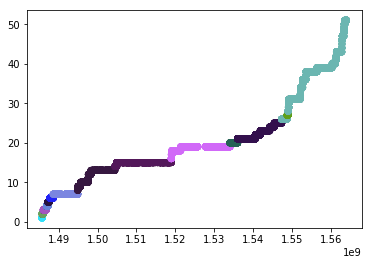

In [9]:
plt.scatter(records_df['timestamp'],records_df['maxCount'], color=colors)

In [10]:
session.close()